In [1]:
from math import sqrt
from numpy import arange
from numpy import meshgrid
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
# objectivce function (isto sto i loss funkcija)
def objective_function(x, y):
    return x**2 + y**2

def derivative(x, y):
    return asarray([2.0*x, 2.0*y])

def gradient_decent_adagrad(objective, derivative,bounds,n_iter, step_size):
    # # track all solution
    solutions = list()
    # generate initial point
    solution = bounds[:, 0] + rand(len(bounds))*(bounds[:,1] - bounds[:, 0])
    # ist of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
    # run grradient descent
    for i in range(n_iter):
        # calculating gradient
        gradient = derivative(solution[0], solution[1])
        # update the sum of the square partial derivatives
        for i in range(gradient.shape[0]):
            sq_grad_sums[i] += gradient[i]**2.0
        # build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
            # calcualte the steo size this variable
            alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
            # calcualte new position in this variable
            value = solution[i] - alpha * gradient[i]
            #store this variable
            new_solution.append(value)

        # evaluate candidate point
        solution = asarray(new_solution)
        solutions.append(solution)
        solution_eval = objective(solution[0], solution[1])

        # report progred
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return solutions
    

>1 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.02902286  0.27948766]) = 0.07896
>1 f([-0.0129815   0.23463749]) = 0.05522
>1 f([-0.00582483  0.1993997 ]) = 0.03979
>1 f([-0.00261527  0.17071256]) = 0.02915
>1 f([-0.00117437  0.14686138]) = 0.02157
>1 f([-0.00052736  0.12676134]) = 0.01607
>1 f([-0.00023681  0.10966762]) = 0.01203
>1 f([-0.00010634  0.09503809]) = 0.00903
>1 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
>1 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
>1 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
>1 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
>1 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
>1 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
>1 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
>1 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
>1 f([-7.89647442e-08  2.69937139e-02]) = 0.00073
>1 f([-3.54597657e-08  2.34988084e-02]) = 0.00055
>1 f([-1.59234984e-08  2.04577993e-02]) = 0.00042
>1 f([-7.15057749e-09  1.78112581e-02]) = 0.00032
>1 f([-3.21102543e-09 

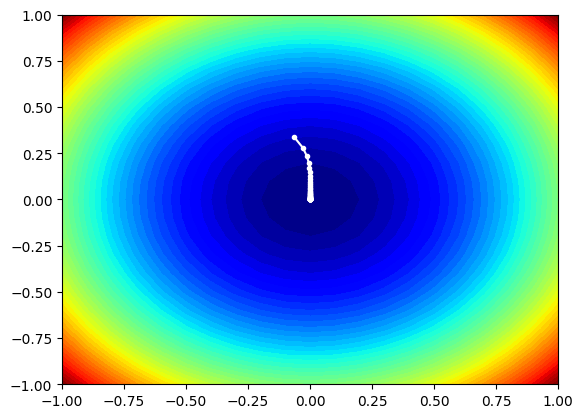

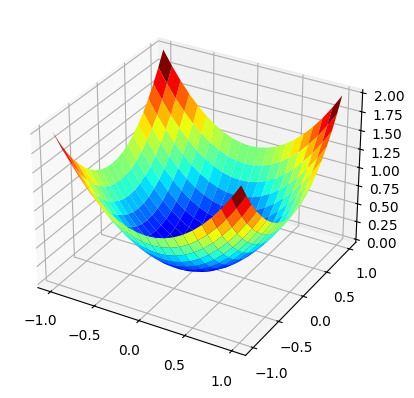

In [3]:
# seed the pseudo random number generator
seed(1)

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 50
step_size = 0.1

solutions = gradient_decent_adagrad(objective_function, derivative, bounds, n_iter, step_size)

# print('Done!')
# print('f(%s) = %f' % (best, score))

# sample input range step 0.1
xaxis = arange(bounds[0, 0], bounds[0,1]+0.1, 0.1)
yaxis = arange(bounds[0, 0], bounds[0,1]+0.1, 0.1)
x, y = meshgrid(xaxis, yaxis)

#compute targer
results = objective_function(x, y)

# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
plt.show()


# plot of inut vs result
figure = plt.figure()
axis = figure.add_subplot(111,projection='3d')
axis.plot_surface(x, y, results, cmap = 'jet')
plt.show()
